In [99]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

tfk=tf.keras
tfkl=tf.keras.layers


In [100]:


model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform"))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer="glorot_uniform"))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer="glorot_uniform"))

In [101]:
print("input shape : ",model.input_shape)
print("output shape:",model.output_shape)
print()
model.summary()


input shape :  (None, 2)
output shape: (None, 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                30        
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)                110       
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
________________________________________

In [102]:
def u_exact(x):
    return 2+np.sin(x[:,0]+2*x[:,1])

In [103]:
def func(x,y):
    return 2+np.sin(x+2*y)

In [104]:
data=np.array([[0,0],[2.0,3]])
print(np.shape(data))
out=u_exact(data)
#print(out)
#print(np.shape(out))

(2, 2)


In [105]:
points=np.linspace(0,1,10,dtype=np.float64)

In [106]:
#print(points)

In [107]:
x0=np.array([[0.0,e] for e in points],dtype=np.float64)
x1=np.array([[1.0,e] for e in points],dtype=np.float64)

In [108]:
#print(x0)
#print(x1)

In [109]:
x=np.concatenate([x0,x1],axis=0)
y=u_exact(x)


In [110]:
x_=np.linspace(0,1,100,dtype=np.float64)


x_0=np.array([[0.0,e] for e in x_],dtype=np.float64)

x_1=np.array([[1.0,e] for e in x_],dtype=np.float64)

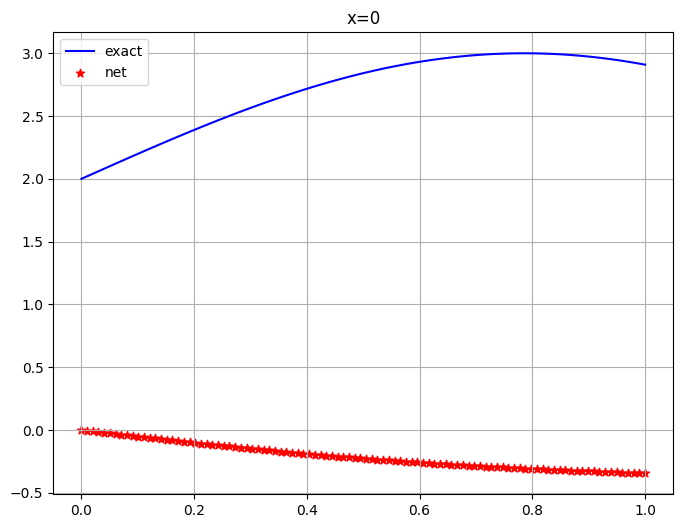

In [111]:
plt.figure(figsize=(8, 6))

plt.plot(x_0[:,1],u_exact(x_0),label='exact', color='blue')
plt.scatter(x_0[:,1],model(x_0),label='net', color='r',marker='*')

plt.legend()
plt.title('x=0')
# Show the plot
plt.grid(True)
plt.show()

In [112]:
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

In [113]:
history=model.fit(x, y, epochs=5000, batch_size=np.size(y))

Epoch 1/5000
1/1 [==============================] - 0s 466ms/step - loss: 8.1759
Epoch 2/5000
1/1 [==============================] - 0s 3ms/step - loss: 8.0462
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.9193
Epoch 4/5000
1/1 [==============================] - 0s 5ms/step - loss: 7.7950
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.6731
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.5530
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.4345
Epoch 8/5000
1/1 [==============================] - 0s 4ms/step - loss: 7.3175
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.2017
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 7.0869
Epoch 11/5000
1/1 [==============================] - 0s 6ms/step - loss: 6.9730
Epoch 12/5000
1/1 [==============================] - 0s 3ms/step - loss: 6.8597
Epoch 13/5000
1/1 [============================

dict_keys(['loss'])


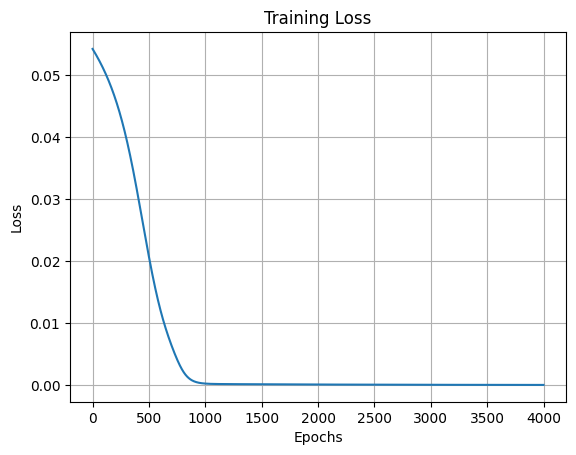

In [114]:
# Access the training history
print(history.history.keys())  # Output: ['loss']

# Plot the training loss over epochs (if you have matplotlib installed)
plt.plot(history.history['loss'][1000:])
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

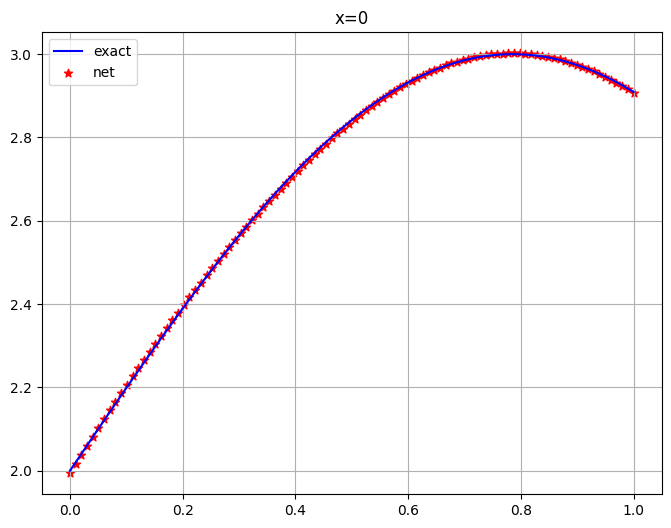

In [115]:
plt.figure(figsize=(8, 6))

plt.plot(x_0[:,1],u_exact(x_0),label='exact', color='blue')
plt.scatter(x_0[:,1],model(x_0),label='net', color='r',marker='*')

plt.legend()
plt.title('x=0')
# Show the plot
plt.grid(True)
plt.show()


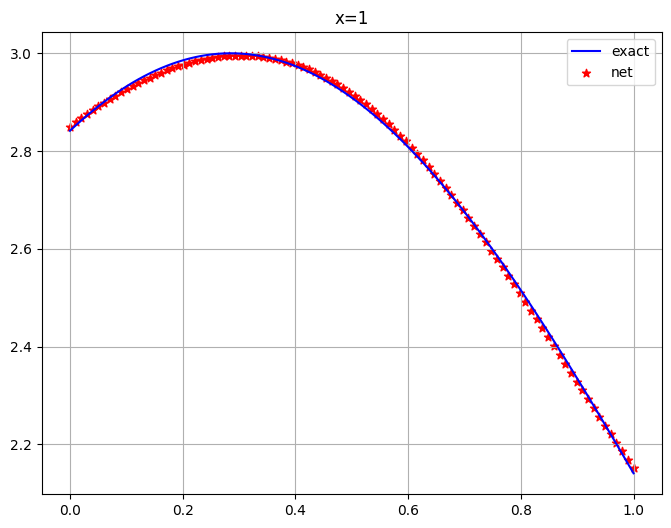

In [116]:
plt.figure(figsize=(8, 6))

plt.plot(x_0[:,1],u_exact(x_1),label='exact', color='blue')
plt.scatter(x_0[:,1],model(x_1),label='net', color='r',marker='*')

plt.legend()
plt.title('x=1')
# Show the plot
plt.grid(True)
plt.show()

In [124]:
def evaluate_model_on_matrix(model, matrix):
    results = []
    for row in matrix:
        # Assuming your model takes a 1D input, reshape the row to a 1D tensor
        input_data = np.reshape(row, (1, -1))
        # Convert the input data to a TensorFlow tensor
        input_tensor = tf.constant(input_data, dtype=tf.float32)
        # Predict using the model
        prediction = model(input_tensor)
        # Convert the prediction to a NumPy array and append to the results list
        results.append(prediction.numpy())
    return np.array(results)

# Example usage
# Assuming 'model' is your TensorFlow model and 'matrix' is your 2D matrix
# result_matrix will contain model predictions for each row of the matrix
result_matrix = evaluate_model_on_matrix(model, X)

print("Result Matrix:")
print(result_matrix)








ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 2), found shape=(1, 200)

In [122]:

from mpl_toolkits.mplot3d import Axes3D


# Generate values for x and y
x = np.linspace(0, 1, 200)  # 400 points between -10 and 10
y = np.linspace(0, 1, 200)  # 400 points between -10 and 10

# Create a grid of x, y values
X, Y = np.meshgrid(x, y)

print(np.shape(X))

# Calculate the function values for each point in the grid
Z = func(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D function
ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('X Axis Label')
ax.set_ylabel('Y Axis Label')
ax.set_zlabel('Z Axis Label')

# Set title for the plot
ax.set_title('3D Function: $sin(\sqrt{x^2 + y^2})$')  # LaTeX-style rendering for the title

# Show the 3D plot
plt.show()


(200, 200)


ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).

Input 0 of layer "dense_15" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (1, 2, 200, 200)

Call arguments received by layer 'sequential_3' (type Sequential):
  • inputs=tf.Tensor(shape=(1, 2, 200, 200), dtype=float64)
  • training=None
  • mask=None